下準備

TensorFlowのバージョン

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.13.1


Fashion MNISTデータ取得

In [2]:
import keras

fashion_mnist = keras.datasets.fashion_mnist

(train_data, train_teacher_labels), (test_data, test_teacher_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
fashion_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

データセットを見る

In [6]:
train_data.shape

(60000, 28, 28)

In [7]:
len(train_teacher_labels)

60000

検証データの確認

In [8]:
test_data.shape

(10000, 28, 28)

In [9]:
len(test_teacher_labels)

10000

画像を見てみる


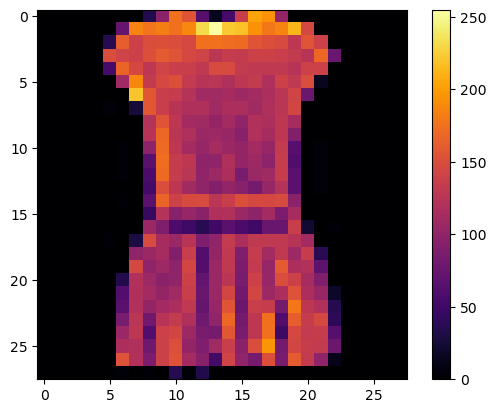

In [10]:
plt.figure()
plt.imshow(train_data[3], cmap='inferno')
plt.colorbar()
plt.grid(False)

データセットの一部を描画する

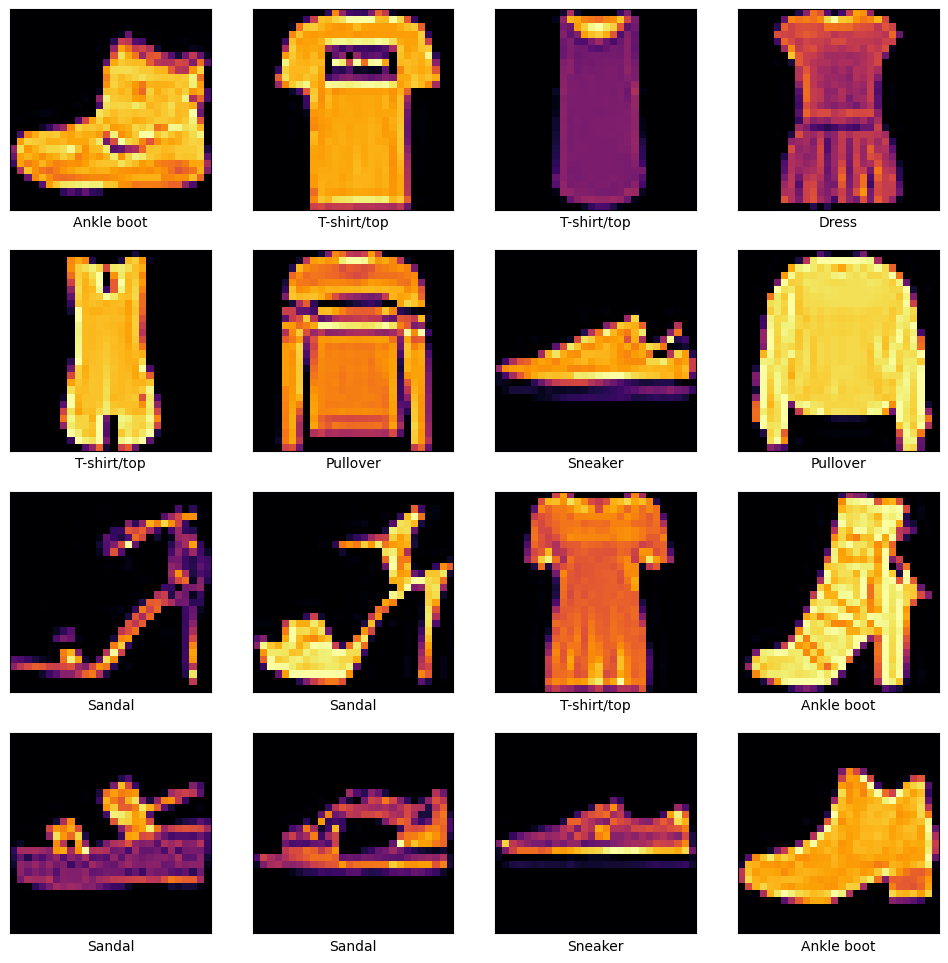

In [11]:
plt.figure(figsize=(12,12))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_data[i], cmap='inferno')
    plt.xlabel(fashion_names[train_teacher_labels[i]])

### 調理手順

設定

In [12]:
BATCH_SIZE = 128
NUM_CLASSES = 10
EPOCHS = 20

IMG_ROWS, IMG_COLS = 28, 28

学習モデルに合わせてデータ調整

In [13]:
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

In [14]:
train_data /= 255
test_data /= 255

print('学習データ train_data shape:', train_data.shape)
print(train_data.shape[0], 'サンプルを学習します')
print('検証データ test_data shape:', train_data.shape)
print(test_data.shape[0], 'サンプルを検証します')

学習データ train_data shape: (60000, 28, 28)
60000 サンプルを学習します
検証データ test_data shape: (60000, 28, 28)
10000 サンプルを検証します


学習モデルの構築

In [15]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import Adam

In [16]:
model = Sequential()
     

# 入力層
model.add(Flatten(input_shape=(IMG_ROWS, IMG_COLS)))
# 中間層
model.add(Dense(128, activation=tf.nn.relu))
# 出力層
model.add(Dense(10, activation=tf.nn.softmax))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


モデルをコンパイル

In [17]:
model.compile(optimizer=Adam(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
def plot_loss_accuracy_graph(fit_record):
  # 青い線で誤差の履歴をプロットします、検証時誤差は黒い線で
  plt.plot(fit_record.history['loss'], "-D", color="blue", label="train_loss", linewidth=2)
  plt.plot(fit_record.history['val_loss'], "-D", color="black", label="val_loss", linewidth=2)
  plt.title('LOSS')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend(loc='upper right')
  plt.show()
  
  # 緑の線で精度の履歴をプロットします、検証時制度は黒い線で
  plt.plot(fit_record.history['accuracy'],"-o", color="green", label="train_accuracy", linewidth=2)
  plt.plot(fit_record.history['val_accuracy'],"-o",color="black", label="val_accuracy", linewidth=2)
  plt.title('ACCURACY')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend(loc="lower right")
  plt.show()

学習

In [19]:
print('反復学習回数：', EPOCHS)
fit_record = model.fit(train_data, train_teacher_labels,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=1,
          validation_data=(test_data, test_teacher_labels))

反復学習回数： 20
Epoch 1/20
469/469 [==============================] - 1s 2ms/step - loss: 0.5595 - accuracy: 0.8066 - val_loss: 0.4669 - val_accuracy: 0.8368
Epoch 2/20
469/469 [==============================] - 1s 2ms/step - loss: 0.4054 - accuracy: 0.8568 - val_loss: 0.4246 - val_accuracy: 0.8491
Epoch 3/20
469/469 [==============================] - 1s 2ms/step - loss: 0.3633 - accuracy: 0.8712 - val_loss: 0.4037 - val_accuracy: 0.8561
Epoch 4/20
469/469 [==============================] - 1s 2ms/step - loss: 0.3382 - accuracy: 0.8784 - val_loss: 0.3784 - val_accuracy: 0.8686
Epoch 5/20
469/469 [==============================] - 1s 2ms/step - loss: 0.3182 - accuracy: 0.8849 - val_loss: 0.3662 - val_accuracy: 0.8660
Epoch 6/20
469/469 [==============================] - 1s 2ms/step - loss: 0.3020 - accuracy: 0.8910 - val_loss: 0.3607 - val_accuracy: 0.8709
Epoch 7/20
469/469 [==============================] - 1s 2ms/step - loss: 0.2872 - accuracy: 0.8949 - val_loss: 0.3495 - val_accuracy: 0.

学習プロセスのグラフ

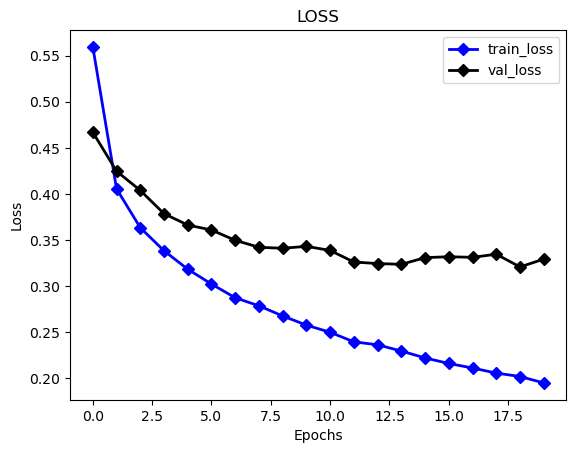

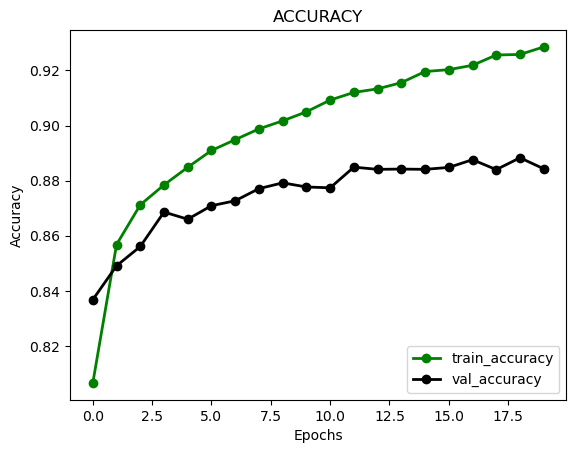

In [20]:
plot_loss_accuracy_graph(fit_record)

検証

In [21]:
result_score = model.evaluate(test_data, test_teacher_labels)

print('検証誤差:', result_score[0])
print('検証正確率:', result_score[1])

313/313 [==============================] - 0s 797us/step - loss: 0.3291 - accuracy: 0.8843
検証誤差: 0.32910460233688354
検証正確率: 0.8842999935150146


予測

(28, 28)


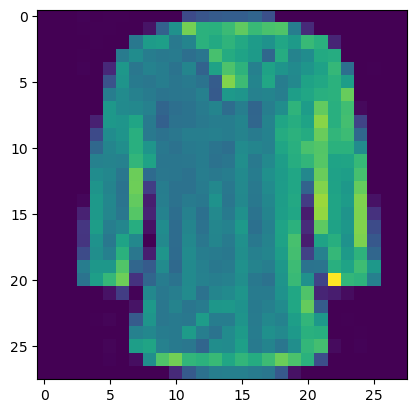

In [30]:
# 検証データから画像を表示します
data_location=4
img = test_data[data_location]
plt.imshow(img)
print(img.shape)

In [23]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


model.predict()は配列しか受け付けない。今は28×28のデータなので配列に変換する必要がある

In [24]:
predictions_result_array = model.predict(img)
print(predictions_result_array)

1/1 [==============================] - 0s 49ms/step
[[2.8521991e-01 4.4256002e-08 2.9897732e-03 9.8908160e-05 2.3379577e-03
  3.4926675e-08 7.0934182e-01 3.2179874e-09 1.1465688e-05 4.1920383e-09]]


In [27]:
number=np.argmax(predictions_result_array[0])
print('予測結果：',fashion_names[number])

予測結果： Shirt


学習済モデルの保存

In [31]:
model.save('keras-fashion-mnist-model.h5')

c:\Users\manab\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
